In [1]:
%reload_ext autoreload
%autoreload 2

from common_imports import *

# Remaking Malinovsky plot
 Investigate adiabaticity

In [30]:
kets = [qt.basis(2,i) for i in range(2)]
e_ops = [qt.ket2dm(ket) for ket in kets]

pulse_duration = 10
binwidth = 2*np.pi/omega0*100
endTime = 3*pulse_duration
N_time = int(endTime/binwidth)
tlist = np.linspace(0,endTime,N_time)
tcentre = endTime/2
tlist_centre = np.full(tlist.size,tcentre)

N_params = 100
rabi0_max = 2*np.pi*(210e-3) # 10ps
chirp_max = 2*np.pi*(60e-3) # 10ps
#rabi0_max = 2*np.pi*(1500e-3) # 1 ps
#chirp_max = 2*np.pi*(1300e-3) # 1 ps
#rabi0_max = 2*np.pi*(90e-3) # 20 ps
#chirp_max = 2*np.pi*(20e-3) # 20 ps
rabis = np.linspace(0,rabi0_max,N_params)

chirps = np.linspace(-chirp_max,chirp_max,N_params)
data = []
data_phases_g = []
data_phases_e = []
opts = qt.Options(store_states=True)
for j in range(N_params):
    expects = []
    phases_g = []
    phases_e = []
    for i in range(N_params):
        rabi0 = rabis[j]
        chirp = chirps[i]
        envelope = rabi0*np.exp(-4*np.log(2)*(tlist-tlist_centre)**2/pulse_duration**2)
        detuning = -chirp*(tlist-tlist_centre)
        H = []
        H.append([qt.Qobj([[0,0],[0,1]]),detuning])
        H.append([-hbar*qt.sigmax(),envelope])

        result = qt.mesolve(tlist = tlist, rho0 = qt.ket2dm(kets[0]), H=H,e_ops=e_ops,options=opts)
        #print(result.expect[1][-1])
        #print(result.states[-1])
        #phases_g.append(float(np.angle(result.states[-1][0])))
        #phases_e.append(float(np.angle(result.states[-1][1])))
        expects.append(result.expect[1][-1])
    data.append(expects)
    #data_phases_g.append(phases_g)
    #data_phases_e.append(phases_e)


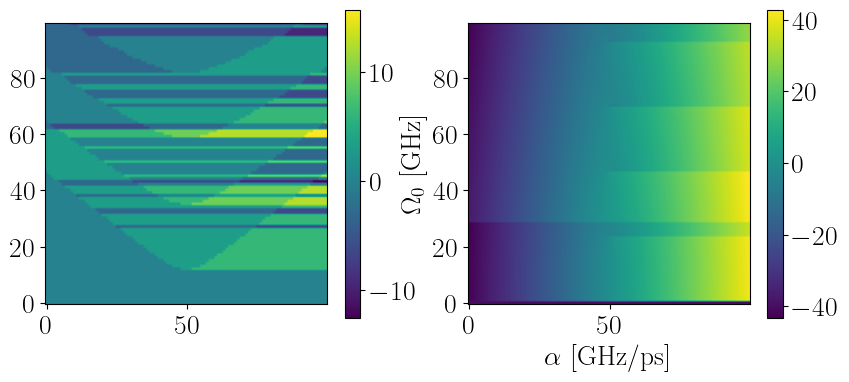

In [94]:
fig,axes=plt.subplots(1,2,figsize=(10,10))

#phase0 = np.unwrap(np.asarray(data_phases_e))

#shifted = np.unwrap(np.asarray(data_phases_e) - np.asarray(data_phases_e)[50])
imshow_1 = axes[0].imshow(np.unwrap(data_phases_g),origin="lower")
imshow_2 = axes[1].imshow(np.unwrap(data_phases_e)-40,origin="lower")
#imshow_2 = axes[1].imshow(shifted,origin="lower")
#ax.imshow(ARP1)
#ax.imshow(ARP2,origin="lower")

plt.colorbar(imshow_1,shrink=0.4)
plt.colorbar(imshow_2,shrink=0.4)
plt.yticks([0,25,50,75,100],[0,50,100,150,200])
plt.xticks([0,25,50,75,100],[-60,-30,0,30,60])
plt.ylabel(r"$\Omega_0$ [GHz]")
plt.xlabel(r"$\alpha$ [GHz/ps]")
#plt.savefig("figures/thesis_draft/malinovsky_new.svg",bbox_inches="tight")
plt.show()

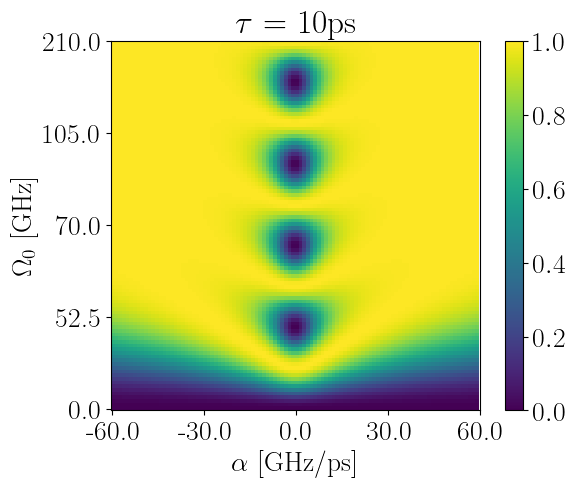

In [32]:
fig,ax=plt.subplots()
imshow = ax.imshow(np.asarray(data),origin="lower")
#ax.imshow(ARP1)
#ax.imshow(ARP2,origin="lower")
plt.colorbar(imshow)
#plt.yticks([0,25,50,75,100],[0,50,100,150,200])
#plt.xticks([0,25,50,75,100],[-60,-30,0,30,60])

plt.yticks([0,25,50,75,100],rabi0_max/(2*np.pi)*1e3*np.asarray([0,1/4,1/3,1/2,1]))
plt.xticks([0,25,50,75,100],chirp_max/(2*np.pi)*1e3*np.asarray([-1,-1/2,0,1/2,1]))

plt.ylabel(r"$\Omega_0$ [GHz]")
plt.xlabel(r"$\alpha$ [GHz/ps]")
plt.title(r"$\tau$ = {}ps".format(pulse_duration))
#plt.savefig("figures/thesis_draft/10ps_malinovsky.svg",bbox_inches="tight")
plt.show()

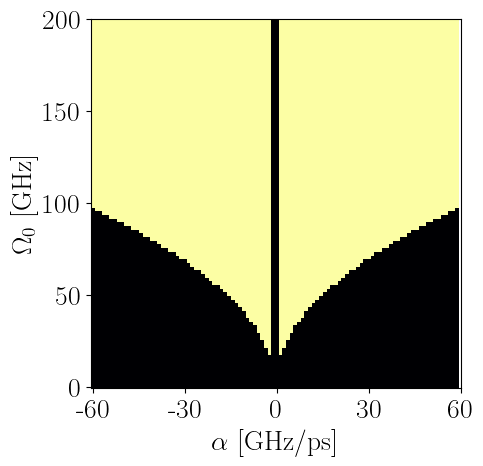

In [61]:
chirps_grid,rabis_grid = np.meshgrid(chirps,rabis) 
ARP1 = np.where(np.abs(chirps_grid)*pulse_duration**2 > 1, 1,0)
ARP2 = np.where(np.abs(chirps_grid)*pulse_duration**2 < rabis_grid**2*pulse_duration**2 , 1,0)
combined_ARP = np.where(ARP1+ARP2 > 1, 1,0)

fig,ax=plt.subplots()
ax.imshow(combined_ARP,origin="lower",cmap="inferno")
plt.yticks([0,25,50,75,100],[0,50,100,150,200])
plt.xticks([0,25,50,75,100],[-60,-30,0,30,60])
plt.ylabel(r"$\Omega_0$ [GHz]")
plt.xlabel(r"$\alpha$ [GHz/ps]")
#plt.savefig("figures/thesis_draft/ARP_conditions.svg",bbox_inches="tight")
plt.show()

# Checking time population spends in excited state

In [65]:
kets = [qt.basis(2,i) for i in range(2)]
e_ops = [qt.ket2dm(ket) for ket in kets]

pulse_duration = 10
binwidth = 2*np.pi/omega0*100
endTime = 3*pulse_duration
N_time = int(endTime/binwidth)
tlist = np.linspace(0,endTime,N_time)
tcentre = endTime/2
tlist_centre = np.full(tlist.size,tcentre)

N_params = 4


chirp = 2*np.pi*(10e-3)
velocities = np.linspace(-5e-6,5e-6,N_params)
rabi0 = 2*np.pi*(200e-3)
data = []
expect_g = []
expect_e = []
for i in range(N_params):
        v = velocities[i]
        envelope = rabi0*np.exp(-4*np.log(2)*(tlist-tlist_centre)**2/pulse_duration**2)
        detuning = omega0-omega0*(1+v/c)-(1+v/c)*chirp*(tlist-tlist_centre)
        H = []
        H.append([qt.Qobj([[0,0],[0,1]]),detuning])
        H.append([-hbar*qt.sigmax(),envelope])

        result = qt.sesolve(tlist = tlist, psi0 = kets[1], H=H,e_ops=e_ops)
        expect_g.append(result.expect[0])
        expect_e.append(result.expect[1])
        


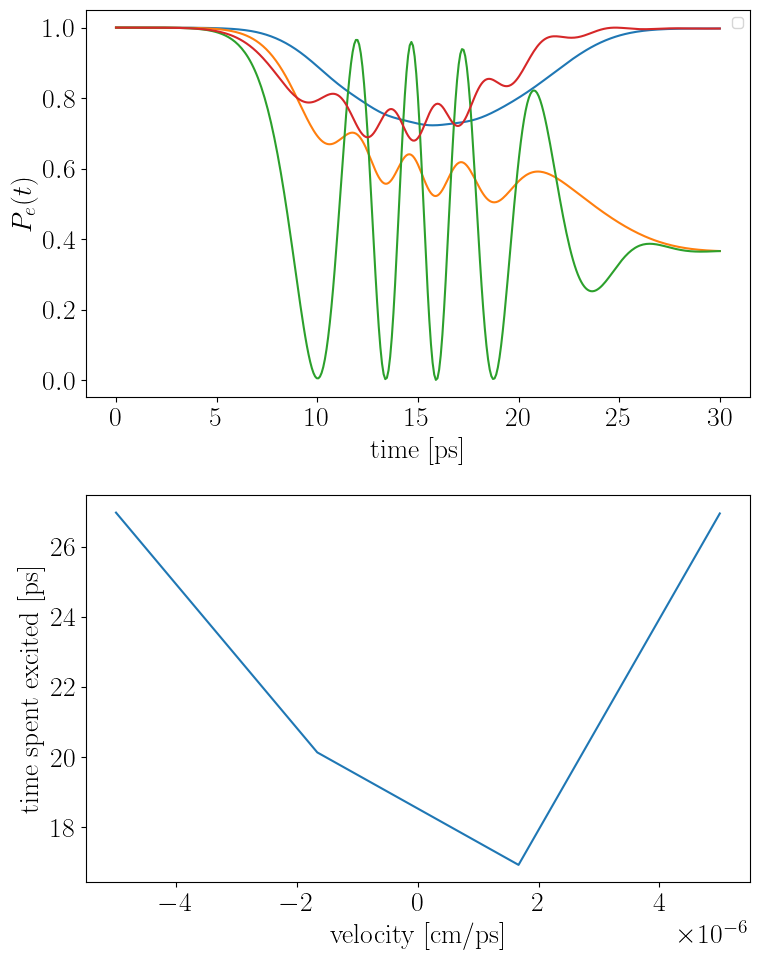

In [66]:
fig,axes= plt.subplots(2,figsize=(8,10))
time_spent_excited = []
for i in range(N_params):
    axes[0].plot(tlist,expect_e[i])
    time_spent_excited.append(np.trapz(expect_e[i],x=tlist))

axes[1].plot(velocities,time_spent_excited)
axes[0].legend(fontsize=10)
axes[0].set_xlabel("time [ps]")
axes[0].set_ylabel(r"$P_e(t)$")
axes[1].set_xlabel("velocity [cm/ps]")
axes[1].set_ylabel("time spent excited [ps]")
fig.tight_layout()
plt.show()

# Checking how the eigenvalue changes for various values of chirp

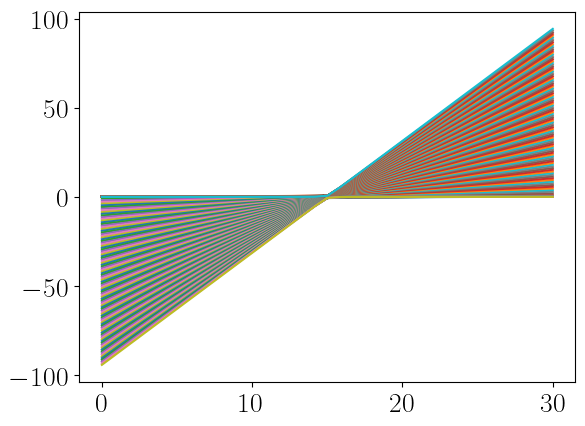

In [12]:
kets = [qt.basis(2,i) for i in range(2)]
e_ops = [qt.ket2dm(ket) for ket in kets]

pulse_duration = 10
binwidth = 2*np.pi/omega0*1000
endTime = 3*pulse_duration
N_time = int(endTime/binwidth)
tlist = np.linspace(0,endTime,N_time)
tcentre = endTime/2
tlist_centre = np.full(tlist.size,tcentre)

N_params = 100


chirp_max = 2*np.pi*(1000e-3)
chirps = np.linspace(0,chirp_max,N_params)
rabi0 = 2*np.pi*(100e-3)
data = []
expect_g = []
expect_e = []
fig,ax=plt.subplots()
for i in range(N_params):
        chirp = chirps[i]
        envelope = rabi0*np.exp(-4*np.log(2)*(tlist-tlist_centre)**2/pulse_duration**2)
        detuning = chirp*(tlist-tlist_centre)
        E1 = []
        E2 = []       
        for i in range(tlist.size):
                H = qt.Qobj([[0,0],[0,1]])*detuning[i]-hbar*qt.sigmax()*envelope[i]
                E1.append(H.eigenenergies()[0])
                E2.append(H.eigenenergies()[1])        
        ax.plot(tlist,E1,tlist,E2)

for i in range(N_params):
        chirp = chirps[i]
        envelope = rabi0*np.exp(-4*np.log(2)*(tlist-tlist_centre)**2/pulse_duration**2)
        detuning = chirp*(tlist-tlist_centre)
        H = []
        H.append([qt.Qobj([[0,0],[0,1]]),detuning])
        H.append([-hbar*qt.sigmax(),envelope])


        result = qt.sesolve(tlist = tlist, psi0 = kets[1], H=H,e_ops=e_ops)
        expect_g.append(result.expect[0])
        expect_e.append(result.expect[1])
        


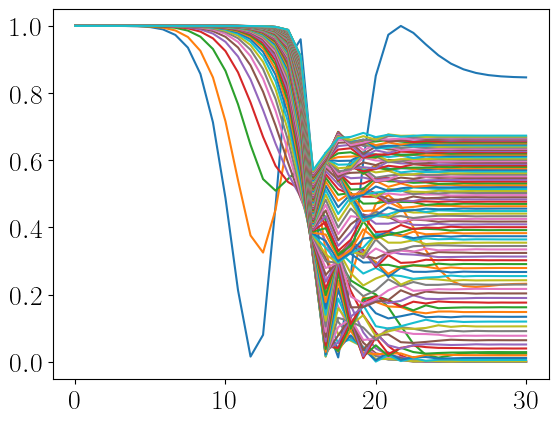

In [13]:
fig,ax= plt.subplots()
time_spent_excited = []
for i in range(N_params):
    ax.plot(tlist,expect_e[i])
    #time_spent_excited.append(np.trapz(expect_e[i],x=tlist))

# axes[1].plot(velocities,time_spent_excited)
# axes[0].legend(fontsize=10)
# axes[0].set_xlabel("time [ps]")
# axes[0].set_ylabel(r"$P_e(t)$")
# axes[1].set_xlabel("velocity [cm/ps]")
# axes[1].set_ylabel("time spent excited [ps]")
# fig.tight_layout()
# plt.show()